In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('H://Dataset/winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

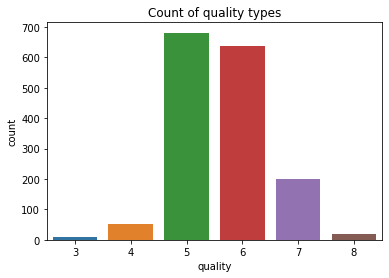

In [9]:
plt.title('Count of quality types')
sns.countplot(data=df, x='quality')
plt.show()

In [13]:
#we have an imbalanced dataset, using resampe from sklearn we will balance the data
quality_three = df[df['quality']==3]
quality_four = df[df['quality']==4]
quality_five = df[df['quality']==5]
quality_six = df[df['quality']==6]
quality_seven = df[df['quality']==7]
quality_eight = df[df['quality']==8]

In [16]:
len(quality_five)

681

In [19]:
df_three = resample(quality_three,replace=True,n_samples=681)
df_four = resample(quality_four,replace=True,n_samples=681)
df_six = resample(quality_six,replace=True,n_samples=681)
df_seven = resample(quality_seven,replace=True,n_samples=681)
df_eight = resample(quality_eight,replace=True,n_samples=681)

In [21]:
# we put back together all of the types
df = pd.concat([quality_five,df_three,df_four,df_six,df_seven,df_eight])

In [24]:
# and will shuffle the dataset
df = shuffle(df)

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1482,7.2,0.58,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.3,4
1484,6.8,0.91,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9,4
943,9.8,0.50,0.34,2.3,0.094,10.0,45.0,0.99864,3.24,0.60,9.7,7
531,11.9,0.38,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,10.3,5
659,7.1,0.84,0.02,4.4,0.096,5.0,13.0,0.99700,3.41,0.57,11.0,4


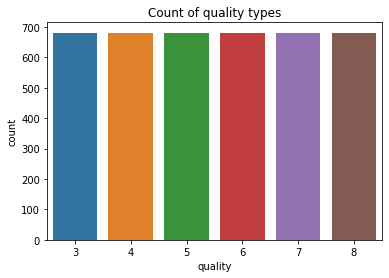

In [26]:
#now the data is balanced
plt.title('Count of quality types')
sns.countplot(data=df, x='quality')
plt.show()

In [35]:
# we reset index after the changes
df.reset_index(inplace=True,drop=True)

<AxesSubplot:>

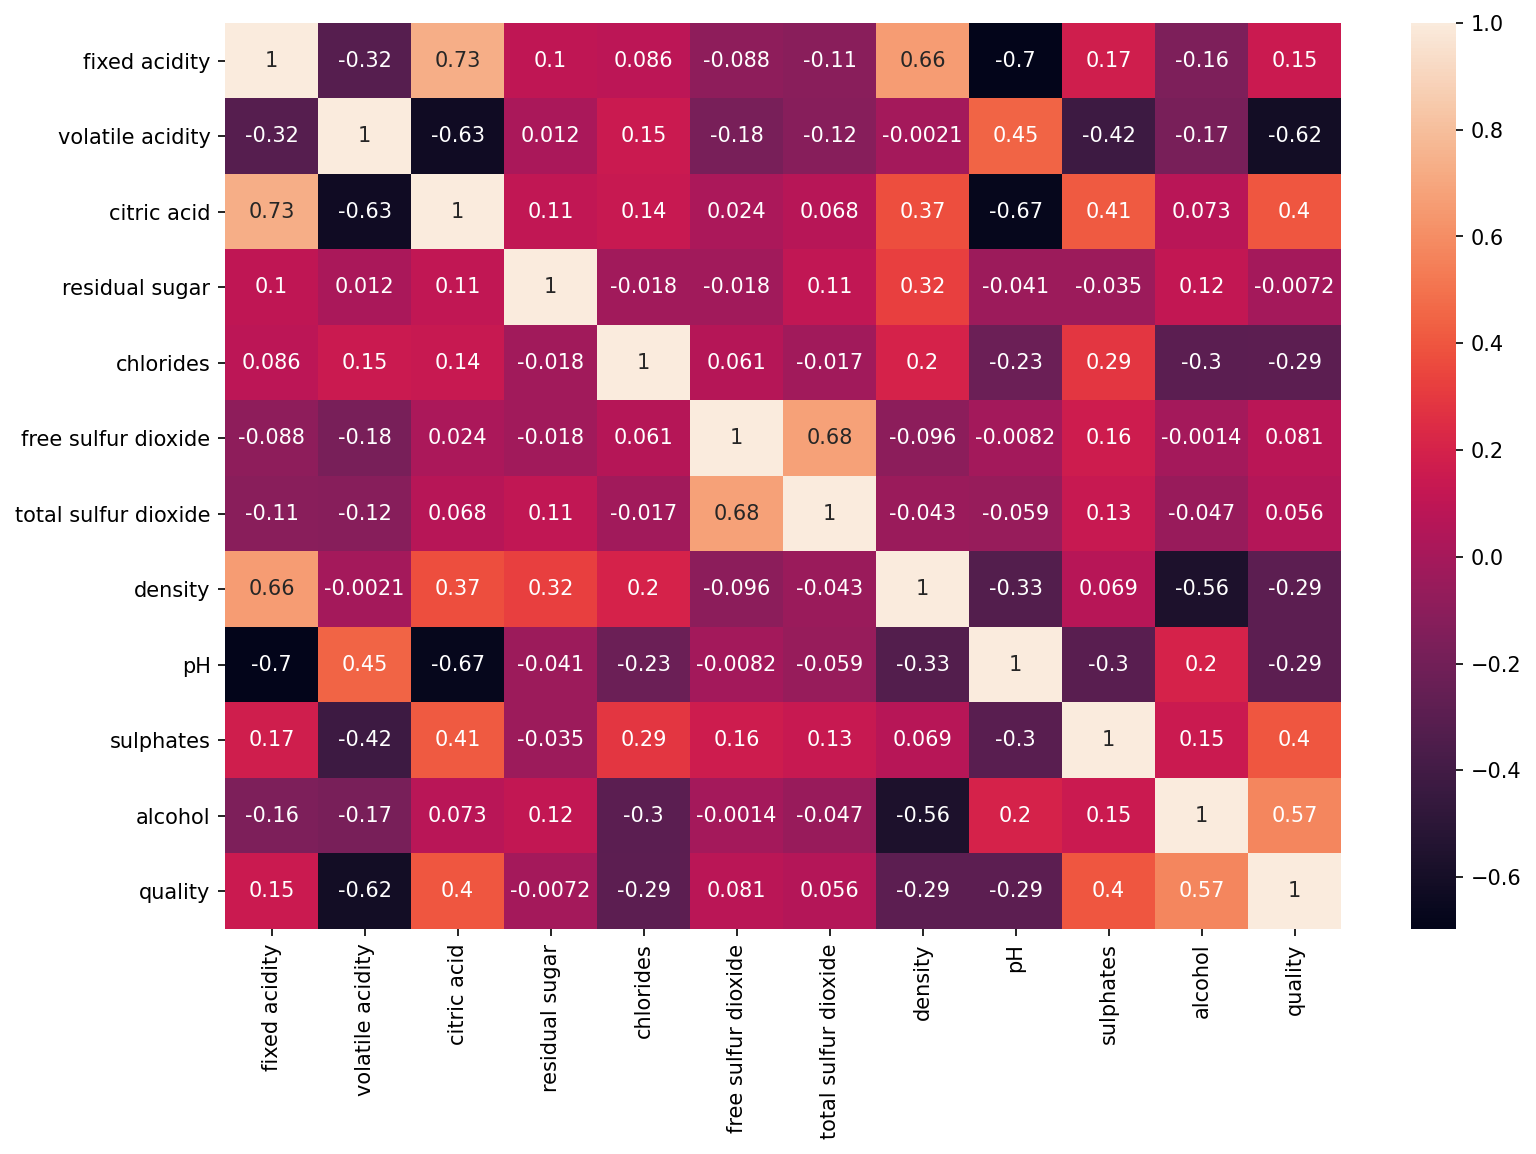

In [40]:
#now we will check for correlations
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(df.corr(),annot=True)

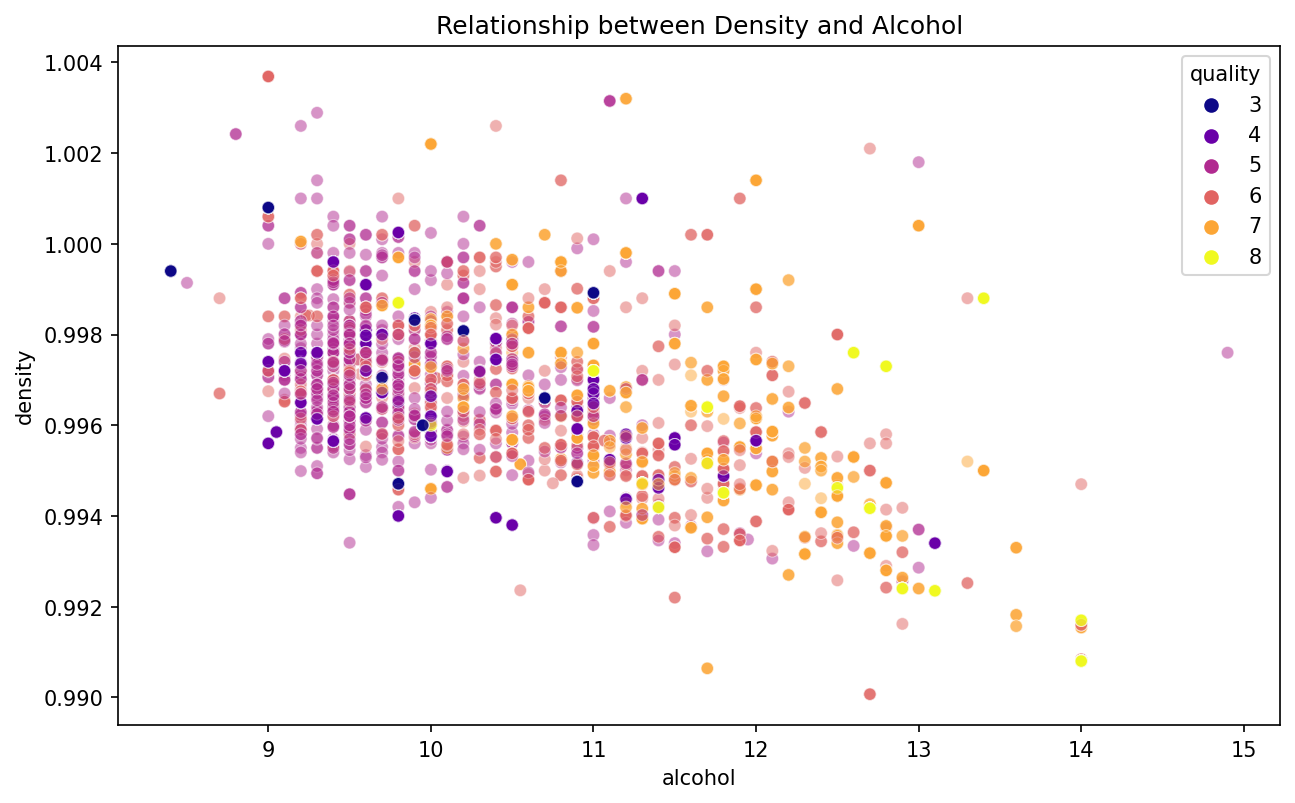

In [60]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(data=df, x='alcohol',y='density',hue='quality',palette='plasma',alpha=0.5)
plt.title('Relationship between Density and Alcohol')
plt.show()

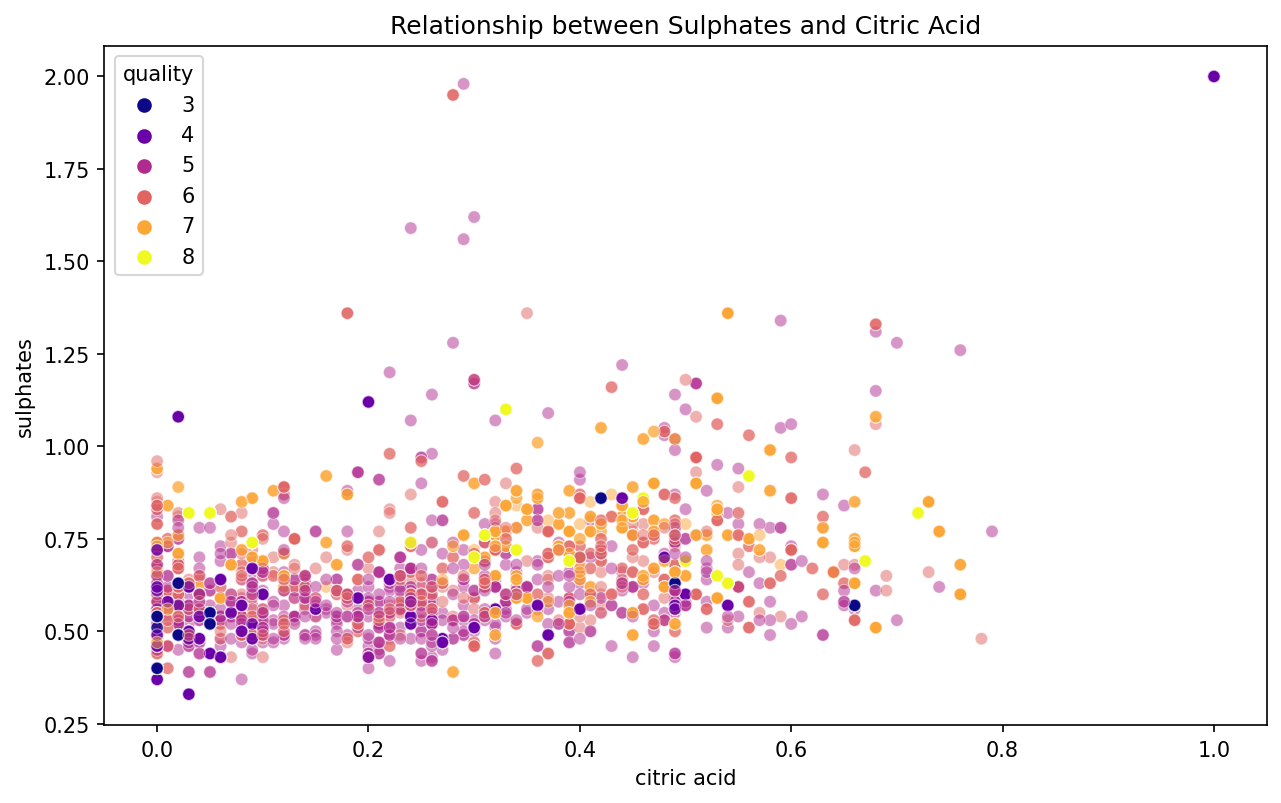

In [63]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(data=df, y='sulphates',x='citric acid',hue='quality',palette='plasma',alpha=0.5)
plt.title('Relationship between Sulphates and Citric Acid')
plt.show()

In [64]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4086.0,8.355996,1.816356,4.60000,7.100000,7.9000,9.5000,15.90000
volatile acidity,4086.0,0.581467,0.268556,0.12000,0.372500,0.5400,0.7150,1.58000
citric acid,4086.0,0.272673,0.221357,0.00000,0.050000,0.2700,0.4600,1.00000
residual sugar,4086.0,2.617658,1.478974,0.90000,1.800000,2.1000,2.6000,15.50000
chlorides,4086.0,0.089555,0.054672,0.01200,0.068000,0.0780,0.0890,0.61100
free sulfur dioxide,4086.0,13.687102,10.246505,1.00000,6.000000,11.0000,18.0000,72.00000
total sulfur dioxide,4086.0,37.793196,30.247618,6.00000,16.000000,29.0000,49.0000,289.00000
density,4086.0,0.996506,0.002071,0.99007,0.995125,0.9966,0.9978,1.00369
pH,4086.0,3.323475,0.169498,2.74000,3.220000,3.3200,3.4200,4.01000
sulphates,4086.0,0.661791,0.182622,0.33000,0.540000,0.6300,0.7400,2.00000


In [70]:
#split the data
X = df.drop('quality',1)
y= df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
#scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [74]:
# A function to report each model performance with deafult parameters
def report_model(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(model,X_test,y_test)
    print(classification_report(y_test,y_pred))
    

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       197
           4       0.76      1.00      0.86       212
           5       0.63      0.49      0.55       225
           6       0.57      0.44      0.50       198
           7       0.74      0.80      0.77       179
           8       0.96      1.00      0.98       215

    accuracy                           0.79      1226
   macro avg       0.77      0.79      0.78      1226
weighted avg       0.77      0.79      0.78      1226



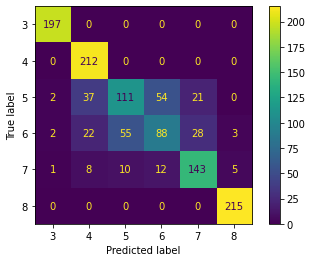

In [76]:
# First we start with KNN
knn = KNeighborsClassifier()
report_model(knn,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           3       0.42      0.63      0.50       197
           4       0.00      0.00      0.00       212
           5       0.56      0.39      0.46       225
           6       0.22      0.38      0.28       198
           7       0.26      0.32      0.29       179
           8       0.57      0.57      0.57       215

    accuracy                           0.38      1226
   macro avg       0.34      0.38      0.35      1226
weighted avg       0.35      0.38      0.35      1226



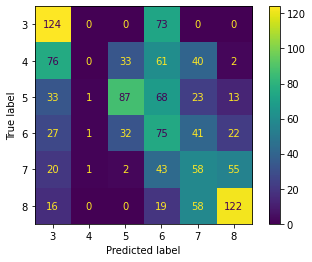

In [80]:
# Support vector classifier
svc = SVC(random_state=42)
report_model(svc,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       197
           4       0.95      1.00      0.97       212
           5       0.87      0.67      0.76       225
           6       0.75      0.80      0.78       198
           7       0.89      0.99      0.94       179
           8       0.99      1.00      0.99       215

    accuracy                           0.91      1226
   macro avg       0.90      0.91      0.90      1226
weighted avg       0.91      0.91      0.90      1226



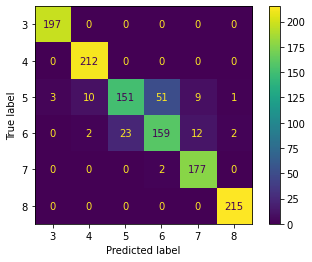

In [81]:
# Decision Trees
dtc = DecisionTreeClassifier(random_state=42)
report_model(dtc,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       197
           4       0.98      1.00      0.99       212
           5       0.84      0.79      0.81       225
           6       0.81      0.74      0.77       198
           7       0.88      0.99      0.93       179
           8       1.00      1.00      1.00       215

    accuracy                           0.92      1226
   macro avg       0.91      0.92      0.92      1226
weighted avg       0.92      0.92      0.92      1226



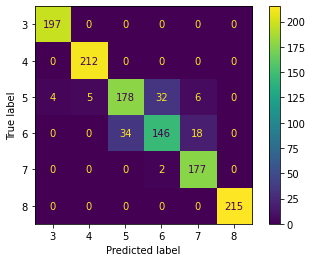

In [82]:
# Random forest classifier
rfc = RandomForestClassifier(random_state=42)
report_model(rfc,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           3       0.33      0.93      0.49       197
           4       0.00      0.00      0.00       212
           5       0.00      0.00      0.00       225
           6       0.29      0.39      0.33       198
           7       0.25      0.41      0.31       179
           8       0.46      0.24      0.31       215

    accuracy                           0.31      1226
   macro avg       0.22      0.33      0.24      1226
weighted avg       0.22      0.31      0.23      1226



C:\Users\Pooyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


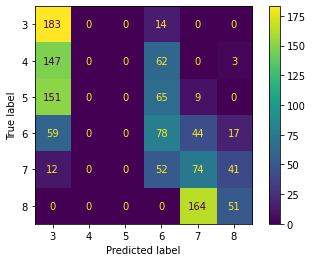

In [83]:
#Ada boost classifier
abc = AdaBoostClassifier(random_state=42)
report_model(abc,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       197
           4       0.99      1.00      1.00       212
           5       0.84      0.81      0.82       225
           6       0.82      0.75      0.78       198
           7       0.90      0.99      0.94       179
           8       1.00      1.00      1.00       215

    accuracy                           0.92      1226
   macro avg       0.92      0.93      0.92      1226
weighted avg       0.92      0.92      0.92      1226



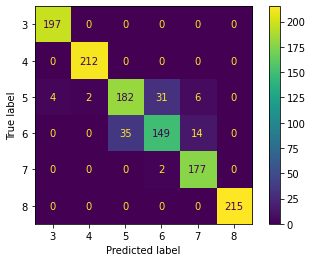

In [91]:
#Based on preliminary results, Random Forests and Decision Trees were selected for hyper parameter tunning
rfc_params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [80 , 100, 150, 200,]}
rfc = RandomForestClassifier()
grid_model_rfc = GridSearchCV(rfc,rfc_params)

report_model(grid_model_rfc,X_train, X_test, y_train, y_test)

In [92]:
#the best parameters:
grid_model_rfc.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       197
           4       0.94      1.00      0.97       212
           5       0.83      0.70      0.76       225
           6       0.76      0.75      0.76       198
           7       0.89      0.99      0.94       179
           8       0.97      1.00      0.99       215

    accuracy                           0.90      1226
   macro avg       0.90      0.91      0.90      1226
weighted avg       0.90      0.90      0.90      1226



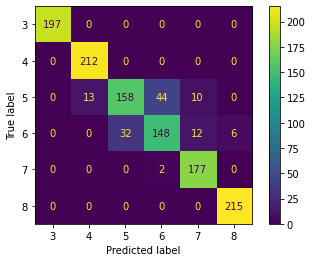

In [95]:
#now we will work on the Decision Tree hyper parameters
dtc_params = {
    'splitter' : ['best','random'],
    'max_depth' : [10,20,30,40,50],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]}
dtc = DecisionTreeClassifier()
grid_model_dtc = GridSearchCV(dtc,dtc_params)

report_model(grid_model_dtc,X_train, X_test, y_train, y_test)

In [98]:
#Between Random Forest Classifier and Decision Tree Classifier, RFC had better performance
#Building the final Model
final_model = RandomForestClassifier(n_estimators=150,bootstrap=False,max_depth=50,max_features='auto',min_samples_leaf=1,min_samples_split=2)
final_model.fit(X,y)

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=150)

In [106]:
#Creataing a dataframe based on the importance of each feature
importance = pd.DataFrame(final_model.feature_importances_,index=X.columns,columns=['Importance']).sort_values(ascending=False,by='Importance')

In [107]:
importance

,Importance
alcohol,0.127451
volatile acidity,0.124613
sulphates,0.119459
total sulfur dioxide,0.094542
chlorides,0.092569
citric acid,0.083658
density,0.080467
pH,0.079376
fixed acidity,0.075329
residual sugar,0.063218


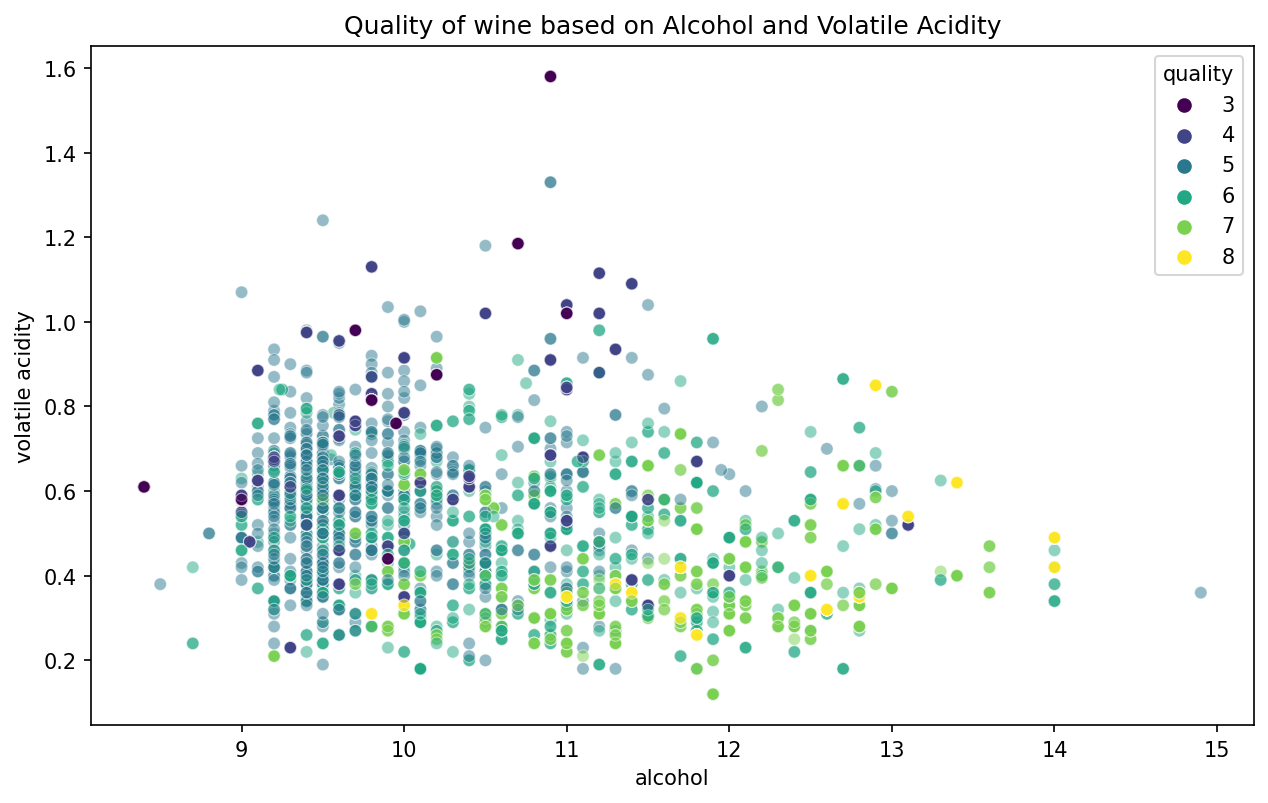

In [111]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Quality of wine based on Alcohol and Volatile Acidity')
sns.scatterplot(data=df, x='alcohol',y='volatile acidity',hue='quality',palette='viridis',alpha=0.5)
plt.show()